In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kmapper as km
import pyballmapper as pbm
import statistics
import seaborn as sns
import networkx as nx
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [14]:
US_fulldataset=pd.read_csv('Outputs/US_ball_results.csv')

In [15]:
US_fulldataset

GEO_ID  Nohighschool_25plus  Highschool_25plus  Somedegree_25plus  \
0        1001                 12.4               34.3               21.5   
1        1003                  9.9               28.7               22.4   
2        1003                  9.9               28.7               22.4   
3        1003                  9.9               28.7               22.4   
4        1005                 26.3               34.9               17.8   
...       ...                  ...                ...                ...   
10742   56043                 12.5               30.8               27.0   
10743   56043                 12.5               30.8               27.0   
10744   56043                 12.5               30.8               27.0   
10745   56045                  8.6               32.7               30.9   
10746   56045                  8.6               32.7               30.9   

       Assocdegree_25plus  Degree_25plus  Under18  18to24  25to34  35to49  \
0                     7.1           24.6     25.2     8.6    12.2    21.0   
1                     9.4           29.5     22.2     7.7    11.3    19.1   
2                     9.4           29.5     22.2     7.7    11.3    19.1   
3                     9.4           29.5     22.2     7.7    11.3    19.1   
4                     8.2           12.9     21.5     9.4    13.8    19.1   
...                   ...            ...      ...     ...     ...     ...   
10742                 8.6           21.1     24.8     5.3    11.3    17.3   
10743                 8.6           21.1     24.8     5.3    11.3    17.3   
10744                 8.6           21.1     24.8     5.3    11.3    17.3   
10745                 9.0           18.8     21.1     6.8    10.4    18.6   
10746                 9.0           18.8     21.1     6.8    10.4    18.6   

       ...  county_name    state  DEMOCRAT_2012  REPUBLICAN_2012  \
0      ...      AUTAUGA  ALABAMA      26.587832        72.618252   
1      ...      BALDWIN  ALABAMA      21.589444        77.358269   
2      ...      BALDWIN  ALABAMA      21.589444        77.358269   
3      ...      BALDWIN  ALABAMA      21.589444        77.358269   
4      ...      BARBOUR  ALABAMA      51.368494        48.223130   
...    ...          ...      ...            ...              ...   
10742  ...     WASHAKIE  WYOMING      20.131846        76.419878   
10743  ...     WASHAKIE  WYOMING      20.131846        76.419878   
10744  ...     WASHAKIE  WYOMING      20.131846        76.419878   
10745  ...       WESTON  WYOMING      12.563263        83.983328   
10746  ...       WESTON  WYOMING      12.563263        83.983328   

       DEMOCRAT_2016  REPUBLICAN_2016  vote_gains  seat_gains  point  ball  
0          23.769671        72.766588    0.148336           0      0     0  
1          19.385601        76.545712   -0.812557           0      1     0  
2          19.385601        76.545712   -0.812557           0      1    22  
3          19.385601        76.545712   -0.812557           0      1    25  
4          46.527844        52.096666    3.873537         100      2     1  
...              ...              ...         ...         ...    ...   ...  
10742      13.948610        76.324069   -0.095809           0   3112     0  
10743      13.948610        76.324069   -0.095809           0   3112    22  
10744      13.948610        76.324069   -0.095809           0   3112    32  
10745       8.479864        86.018151    2.034823           0   3113    18  
10746       8.479864        86.018151    2.034823           0   3113    34  

[10747 rows x 35 columns]

## Coloured by each axes

In [16]:
US_fulldataset.columns

Index(['GEO_ID', 'Nohighschool_25plus', 'Highschool_25plus',
       'Somedegree_25plus', 'Assocdegree_25plus', 'Degree_25plus', 'Under18',
       '18to24', '25to34', '35to49', '50to64', 'Over65', 'White', 'Black',
       'Rural', 'manu_arg', 'Poverty', 'lessthan50K', '50to75k', '75to100k',
       'morethan100k', 'FIPS', 'Adult obesity raw value',
       'Poor or fair health raw value', 'Unemployment raw value',
       'county_name', 'state', 'DEMOCRAT_2012', 'REPUBLICAN_2012',
       'DEMOCRAT_2016', 'REPUBLICAN_2016', 'vote_gains', 'seat_gains', 'point',
       'ball'],
      dtype='object')

In [17]:
# Dataset utilised to build BM plot, epsilon=20 utilised throughout
bmx1=US_fulldataset[['Nohighschool_25plus', 'Highschool_25plus',
       'Somedegree_25plus', 'Assocdegree_25plus', 'Degree_25plus', 'Under18',
       '18to24', '25to34', '35to49', '50to64', 'Over65', 'White',
       'Rural', 'lessthan50K', '50to75k', '75to100k', 'morethan100k',
       'manu_arg', 'Poverty', 'Adult obesity raw value',
       'Poor or fair health raw value', 'Unemployment raw value']]

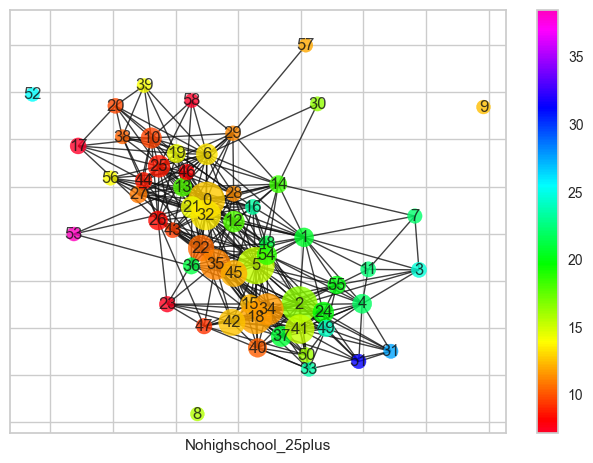

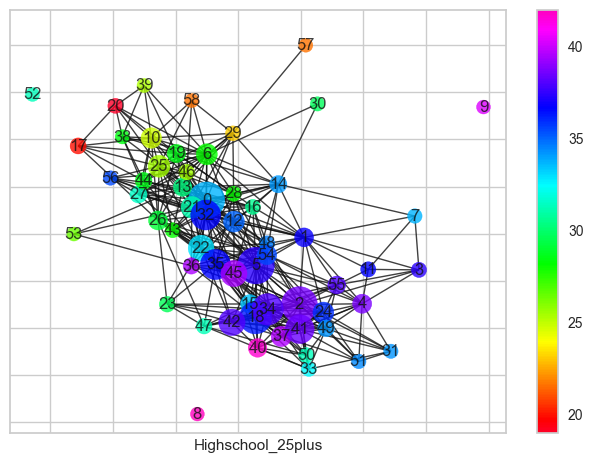

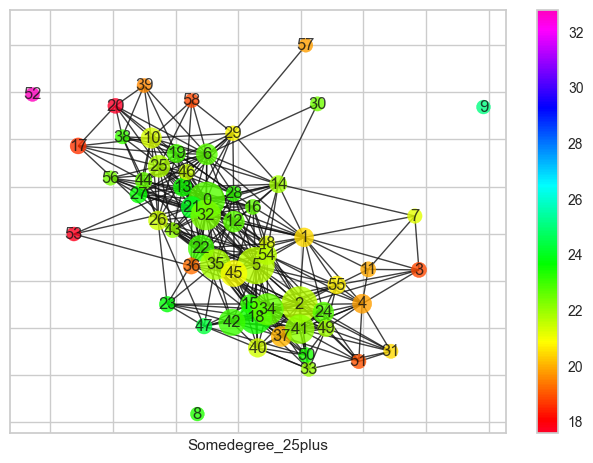

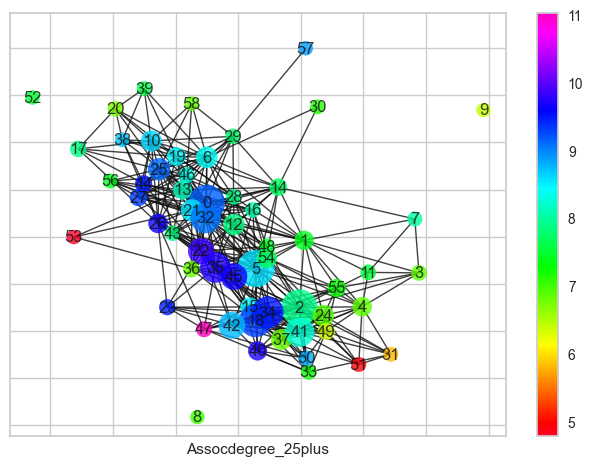

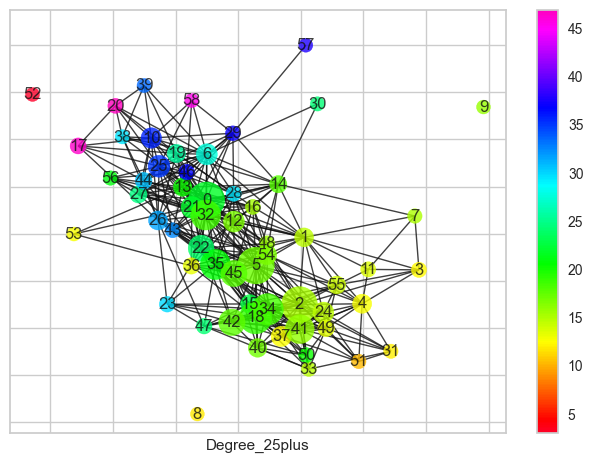

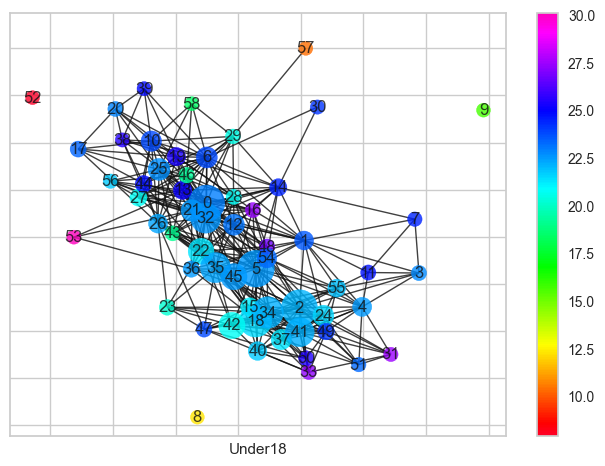

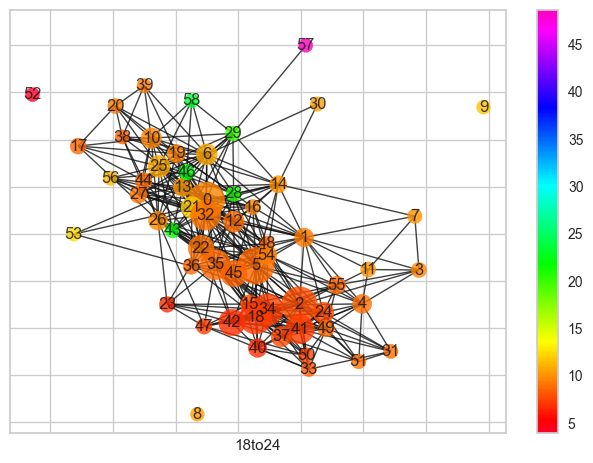

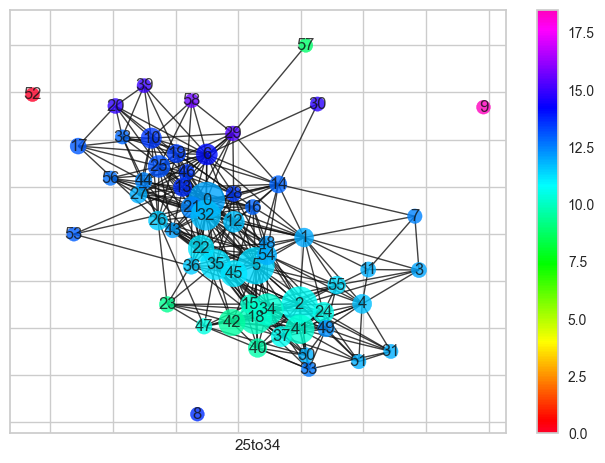

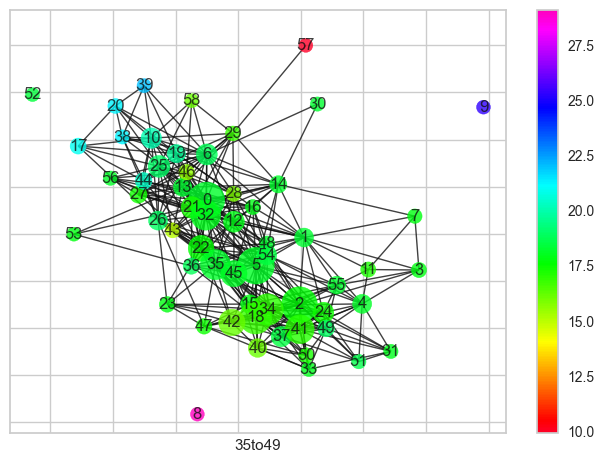

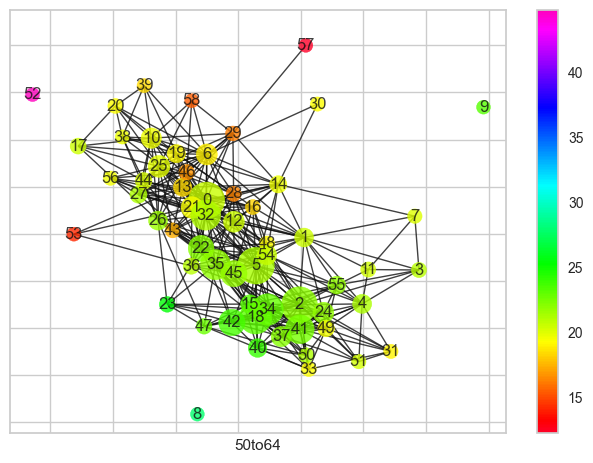

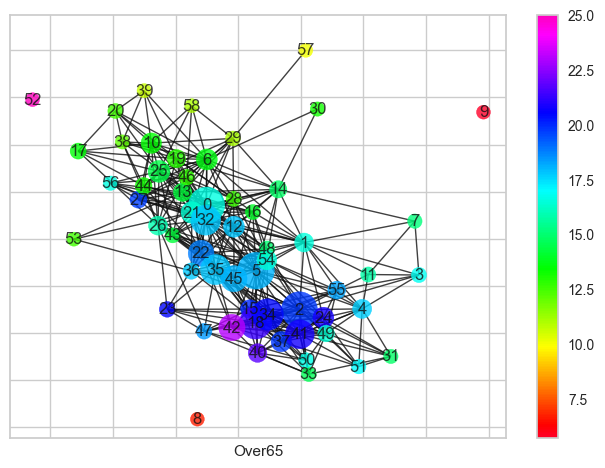

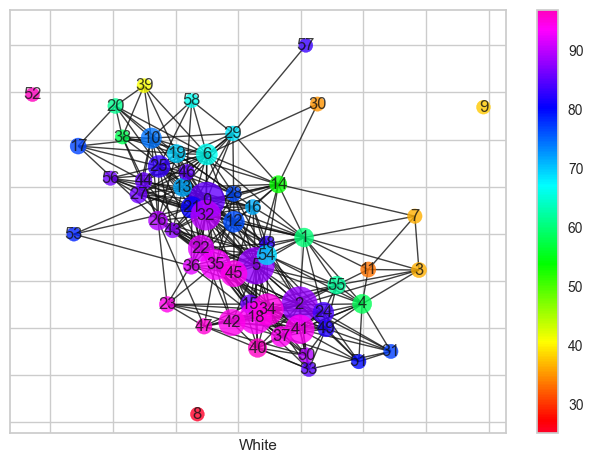

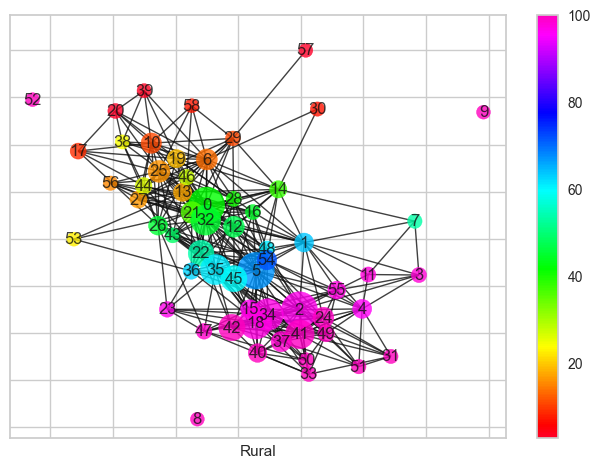

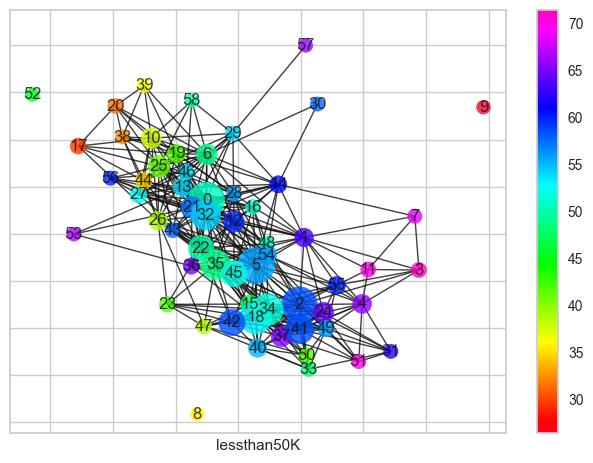

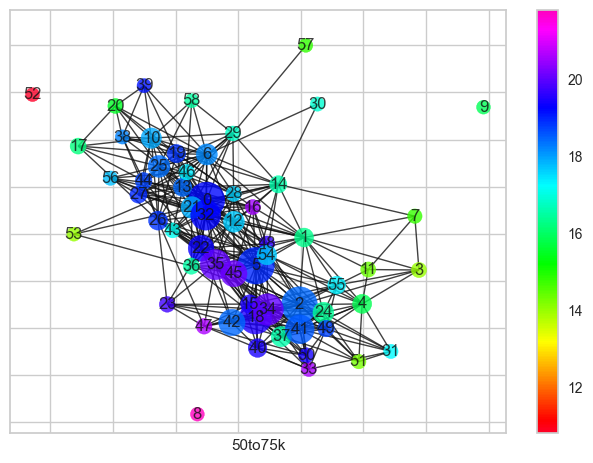

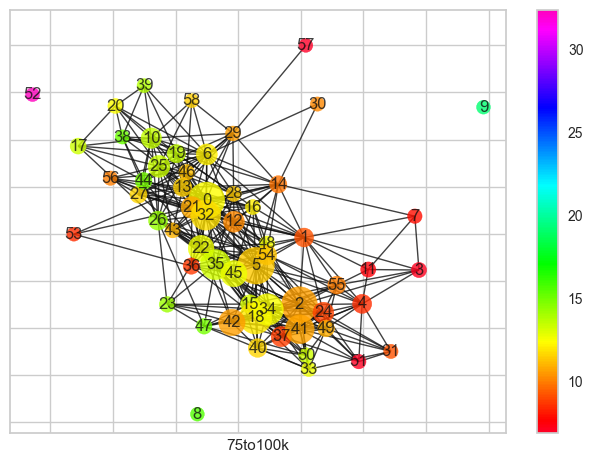

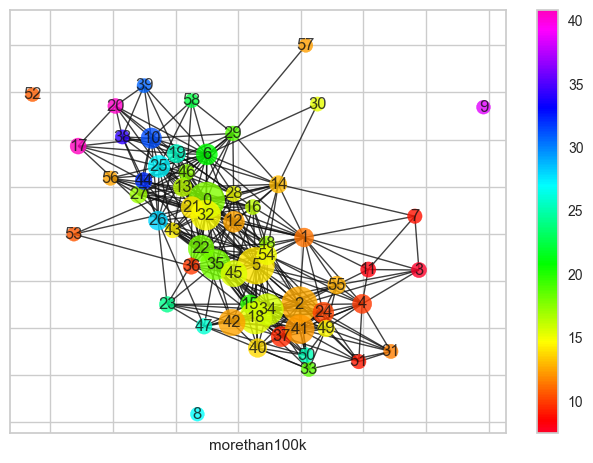

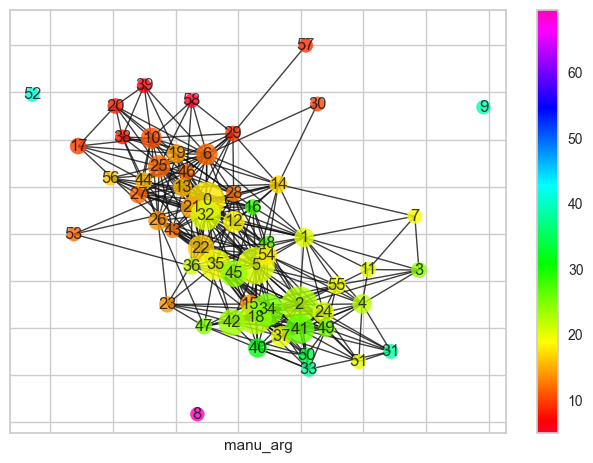

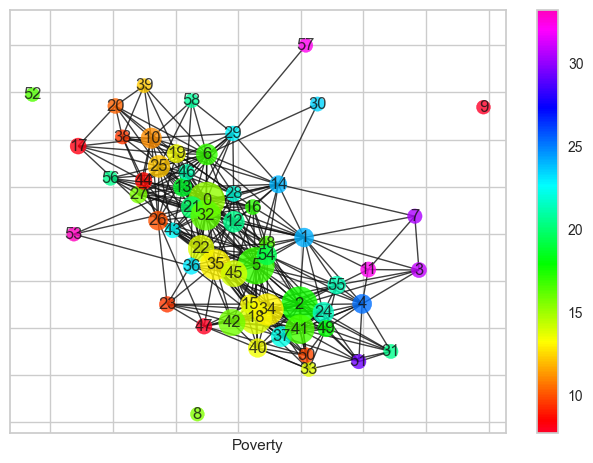

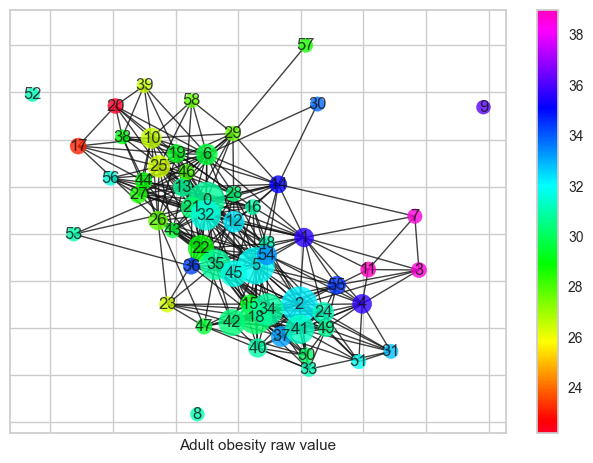

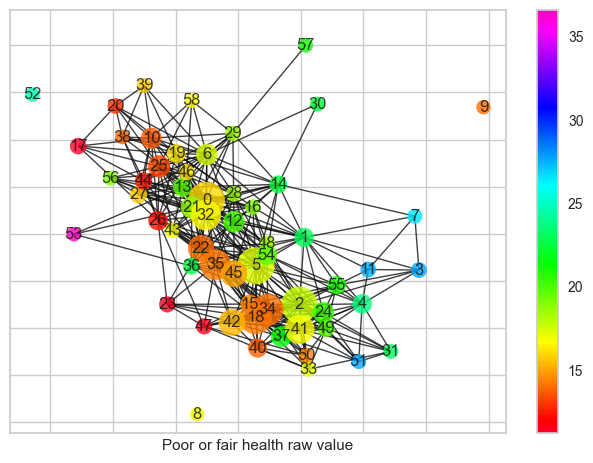

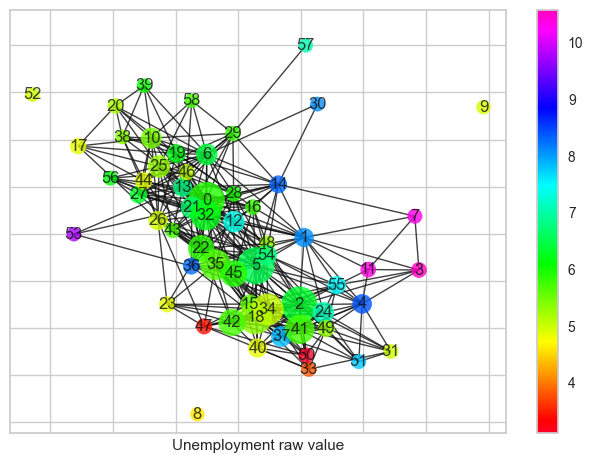

In [24]:
columns=['Nohighschool_25plus', 'Highschool_25plus',
       'Somedegree_25plus', 'Assocdegree_25plus', 'Degree_25plus', 'Under18',
       '18to24', '25to34', '35to49', '50to64', 'Over65', 'White',
       'Rural', 'lessthan50K', '50to75k', '75to100k', 'morethan100k',
       'manu_arg', 'Poverty', 'Adult obesity raw value',
       'Poor or fair health raw value', 'Unemployment raw value']
for col in columns:
    cdf = pd.DataFrame(US_fulldataset[col])
    bm1=pbm.BallMapper(X=bmx1, eps=35 ,coloring_df=cdf)
    hsvp = cm.get_cmap("gist_rainbow")
    bm1.draw_networkx(coloring_variable=col,color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.5,seed=5))
    plt.xlabel(col) 
    filename = ["tdabm_US" + str(col) + ".png"] 
    plt.savefig("TDABM by axes/"+str(filename[0]))
    plt.show()

## Maps for each ball

In [19]:
gb_shape=gpd.read_file('UScounties/UScounties.shp')
gb_shape['FIPS']=gb_shape['FIPS'].astype(int)

In [20]:
gb_shape2=gb_shape.merge(US_fulldataset, left_on='FIPS',right_on='GEO_ID')

<Axes: >

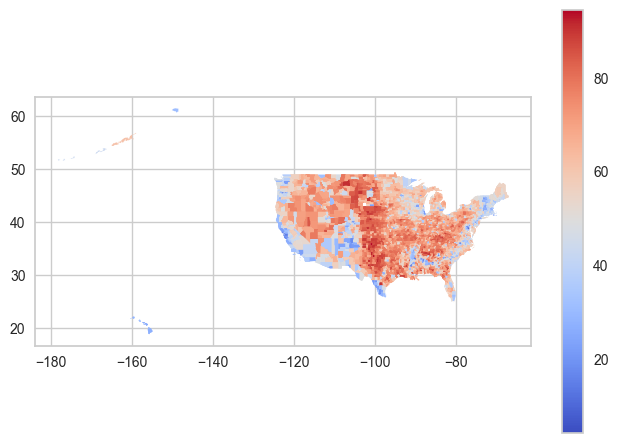

In [21]:
gb_shape2.plot(column='REPUBLICAN_2016',legend=True,cmap='coolwarm')

<Axes: >

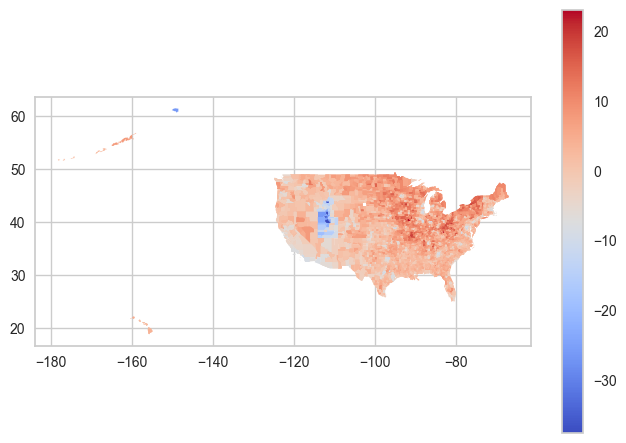

In [22]:
gb_shape2.plot(column='vote_gains',legend=True,cmap='coolwarm')

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_31017/457578798.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_31017/457578798.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_31017/457578798.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_31017/457578798.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_31017/457578798.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_31017/457578798.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown

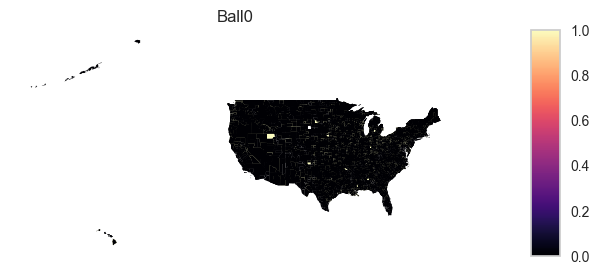

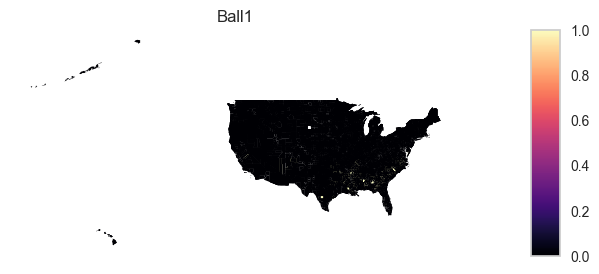

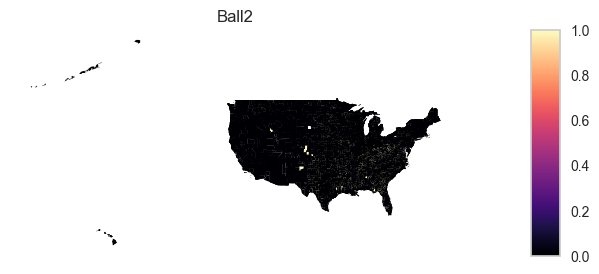

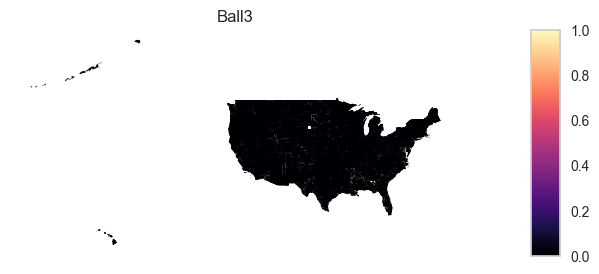

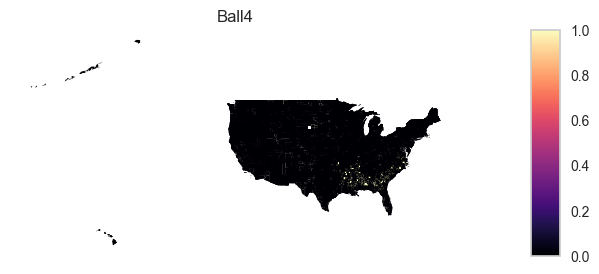

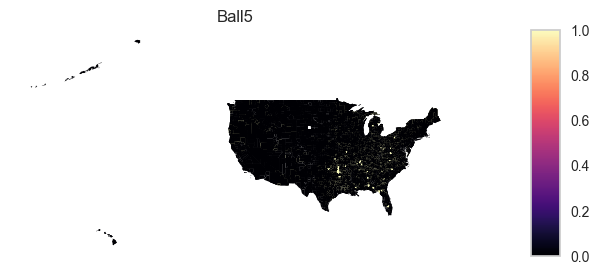

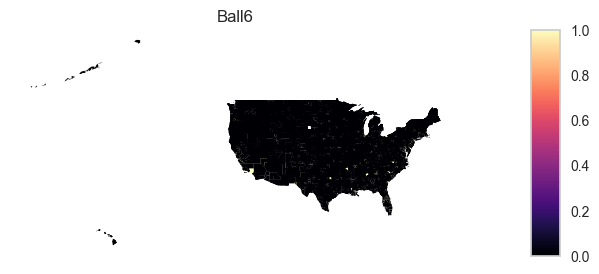

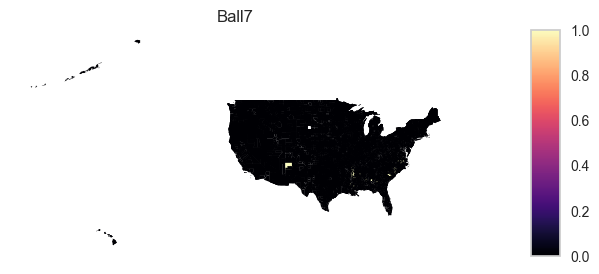

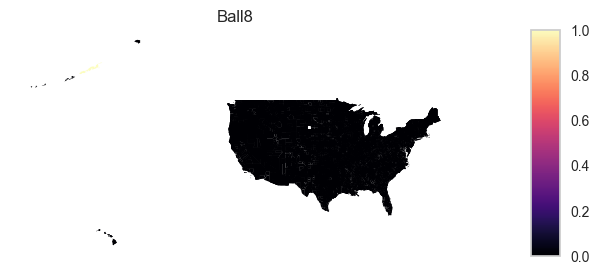

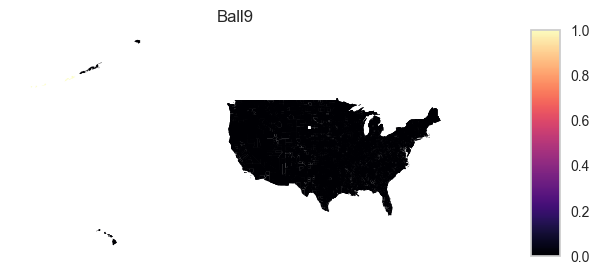

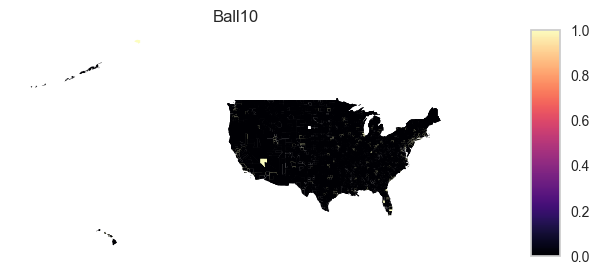

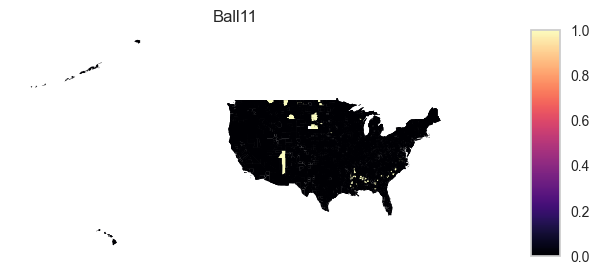

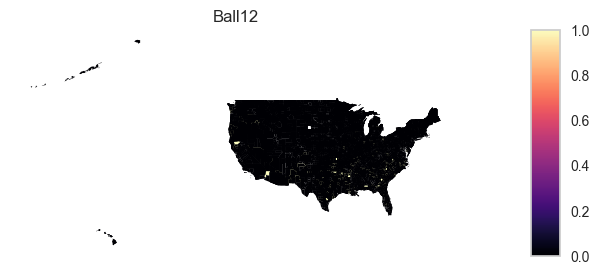

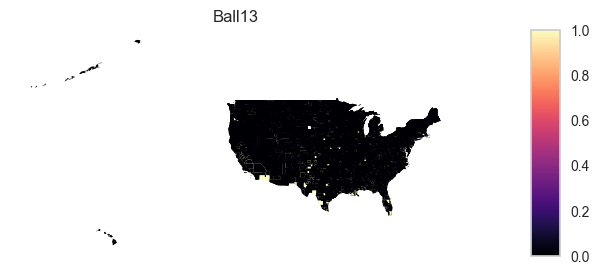

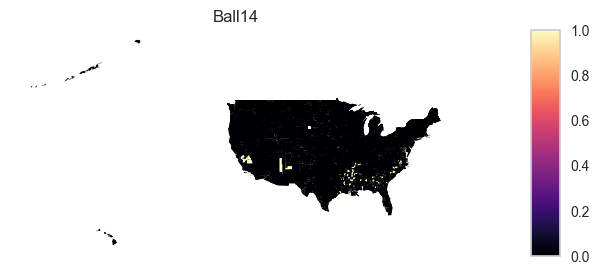

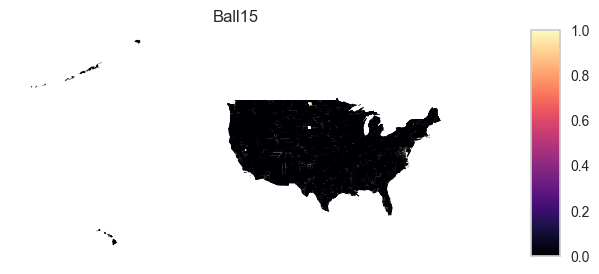

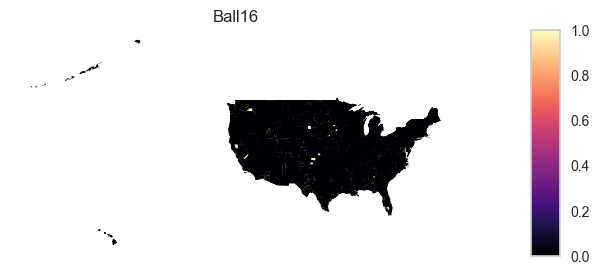

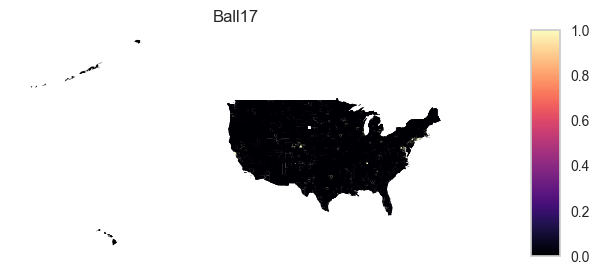

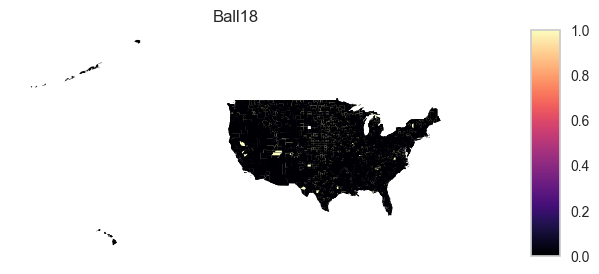

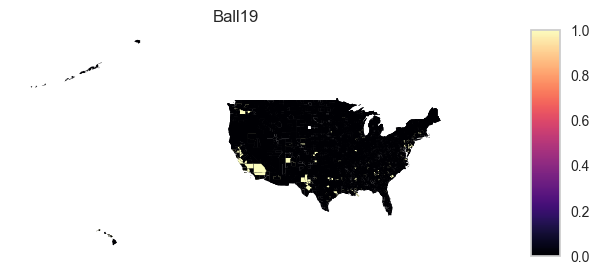

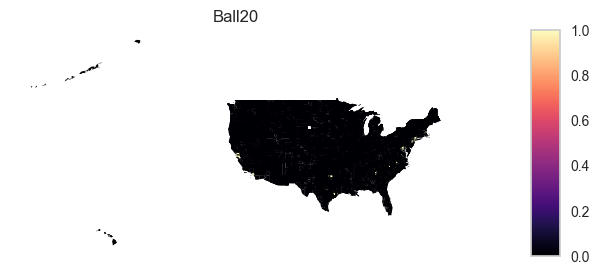

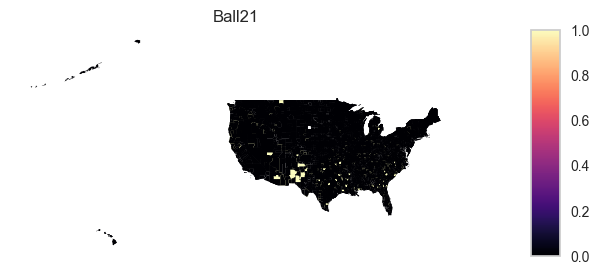

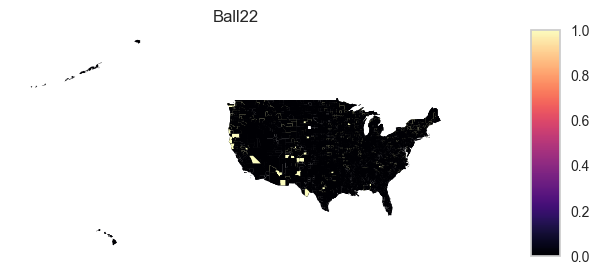

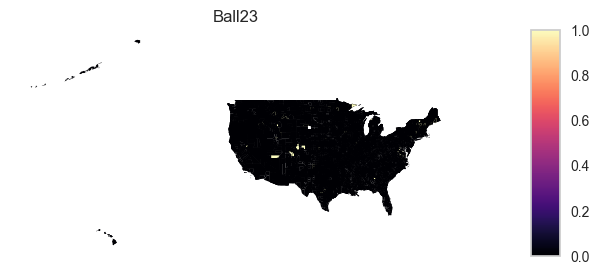

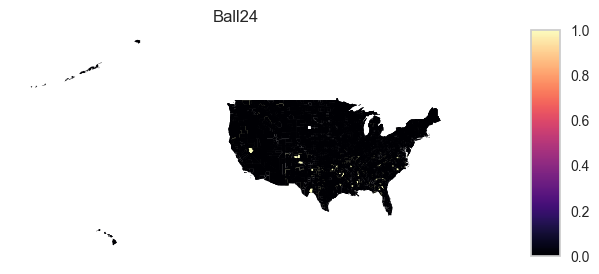

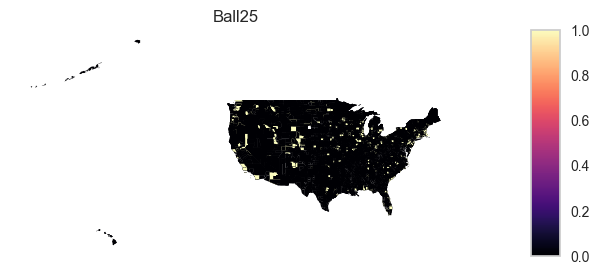

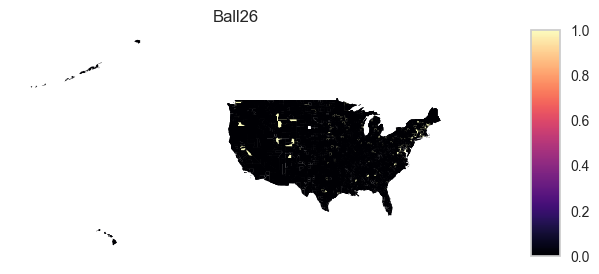

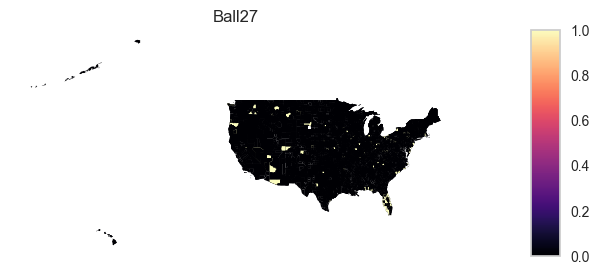

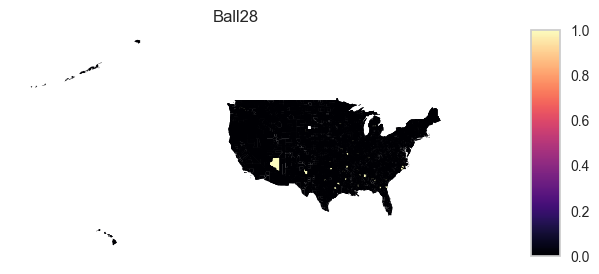

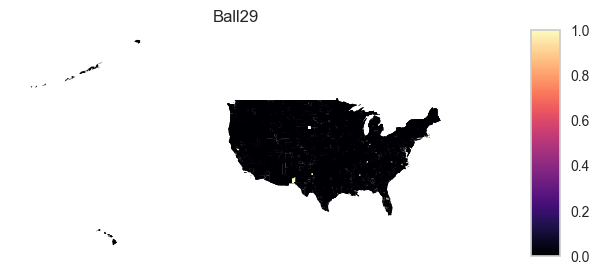

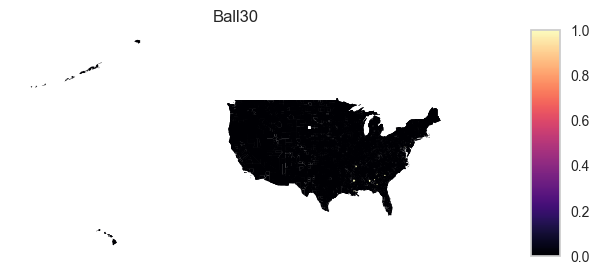

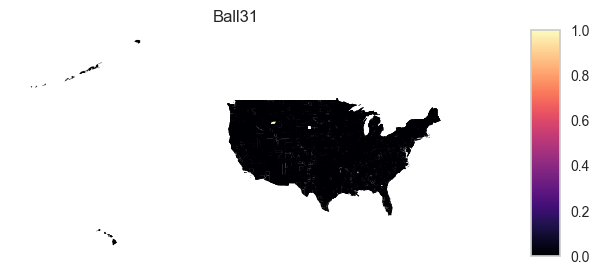

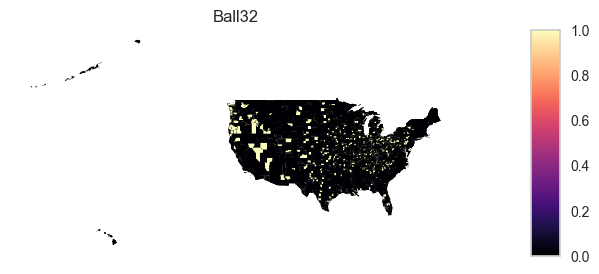

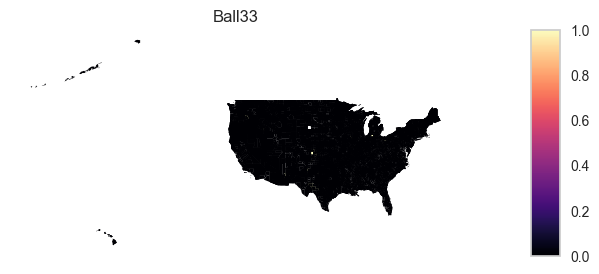

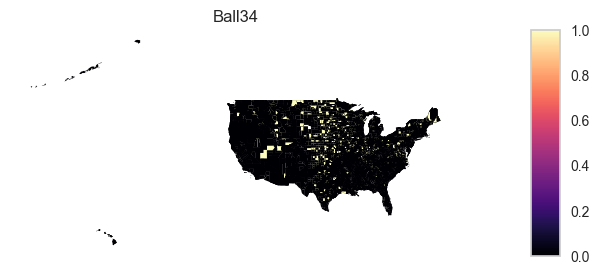

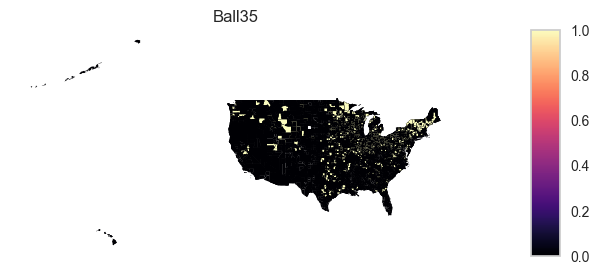

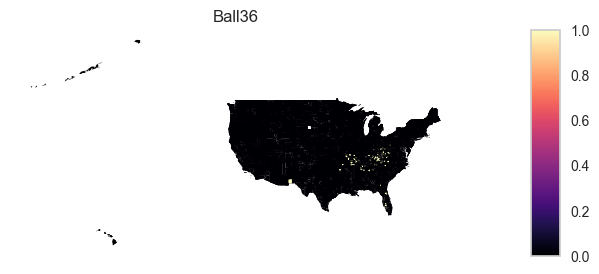

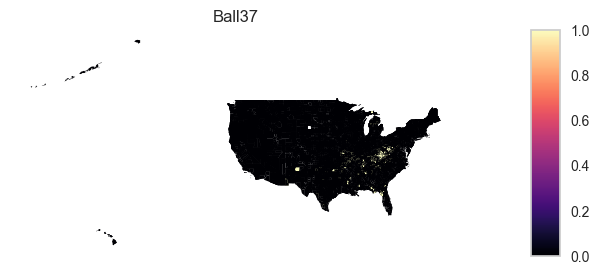

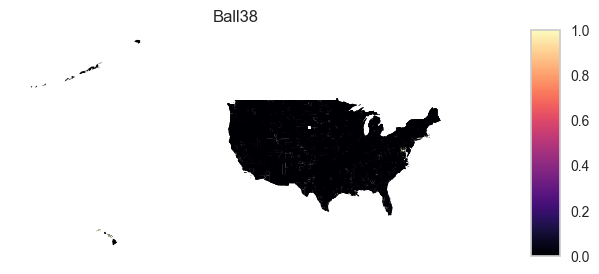

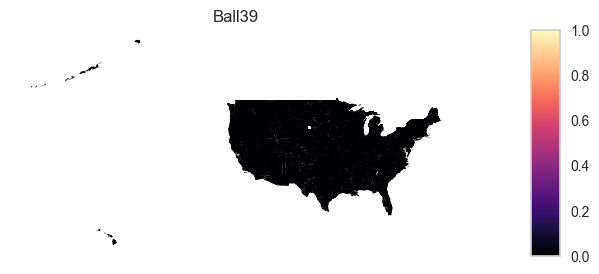

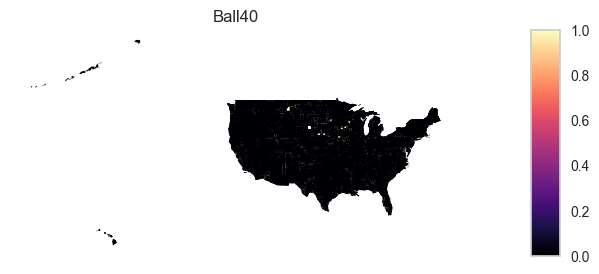

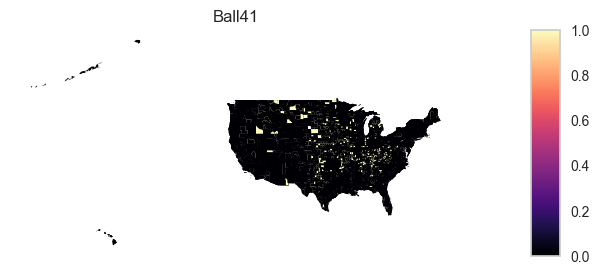

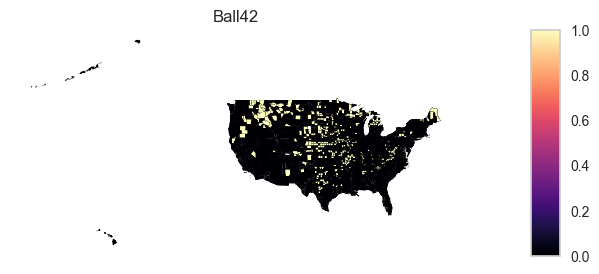

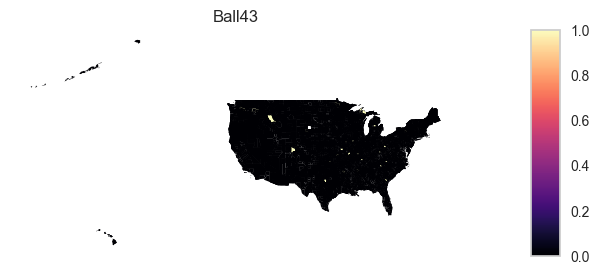

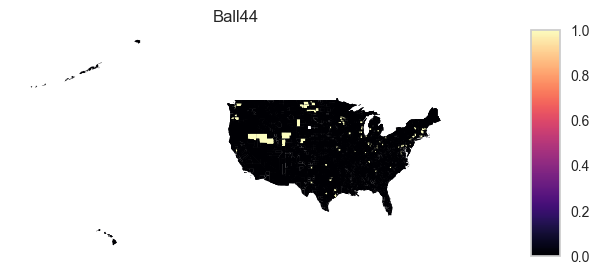

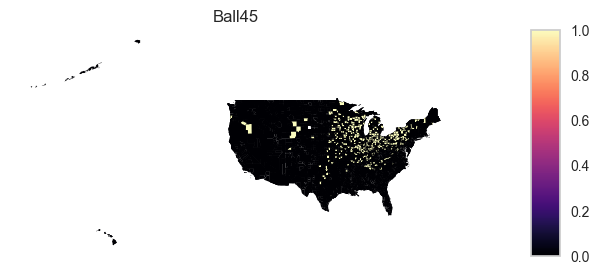

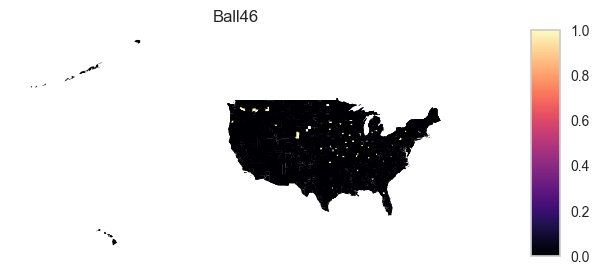

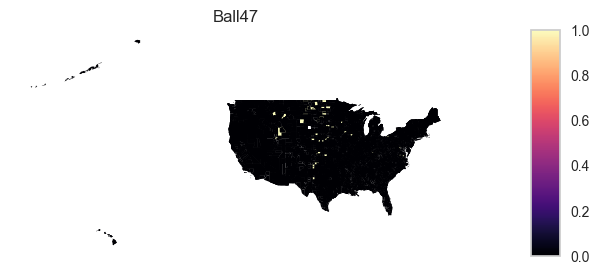

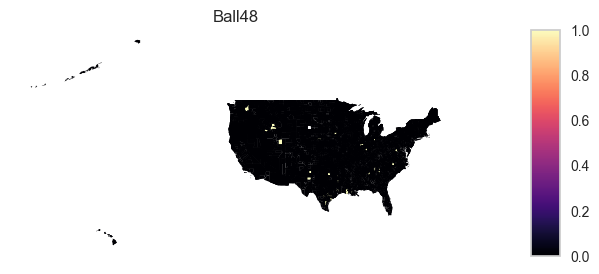

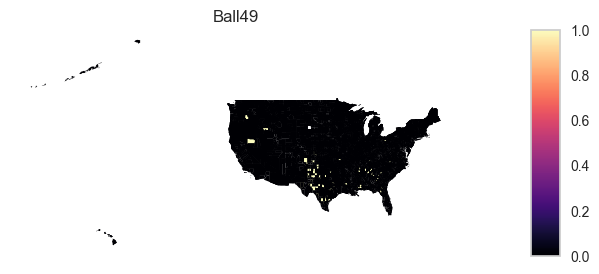

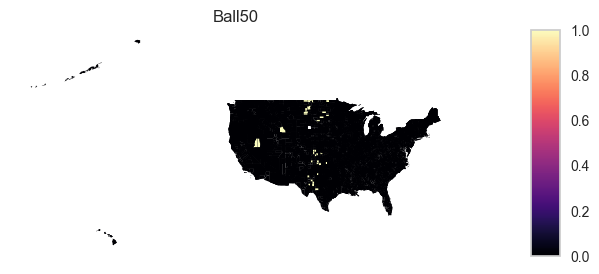

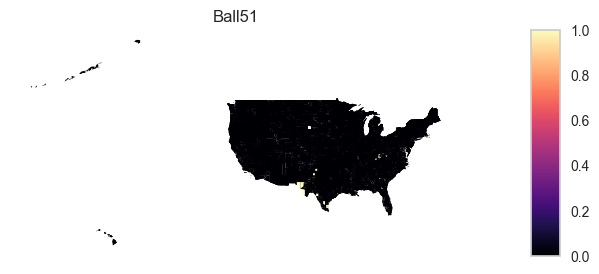

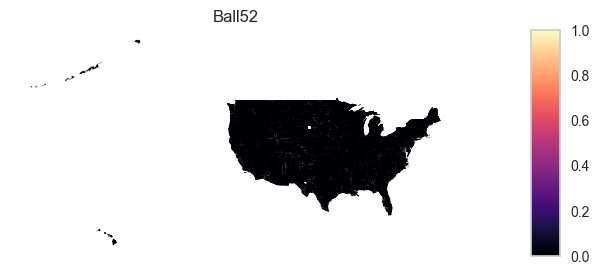

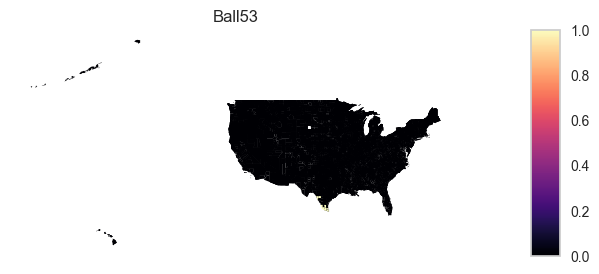

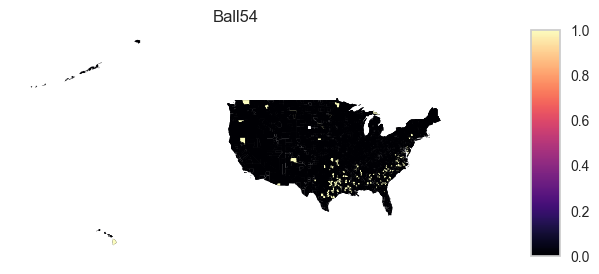

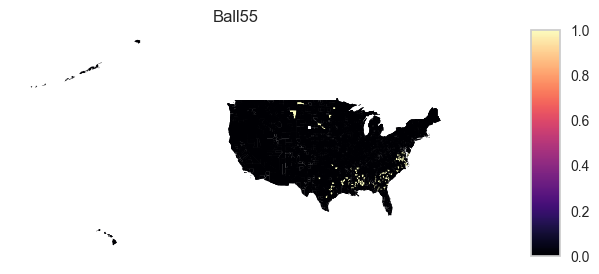

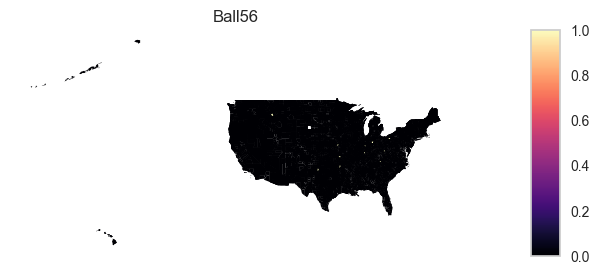

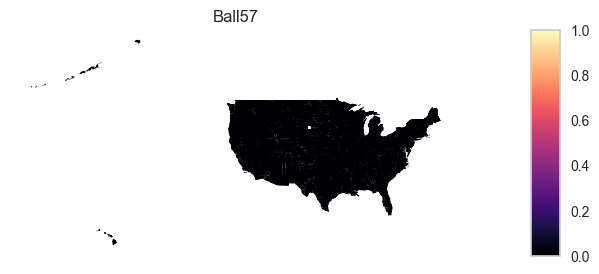

In [23]:
a001 = max(gb_shape2['ball'])
for i in range(0,a001):
    gb_shape2['balld'] = (gb_shape2['ball']==i)*1
    fig, ax = plt.subplots(1,1)
    ax.set_axis_off()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right",size="5%", pad=0.0)
    ax.set_title("Ball"+ str(i))
    gb_shape2.plot(column="balld",ax=ax,legend=True,cax=cax,cmap='magma')
    fig.show()
    filename = ["ballmap" + str(i) + ".png"] 
    fig.savefig("Ball Maps/"+str(filename[0]))